<a href="https://colab.research.google.com/github/sath8/Neural-Network-Labs/blob/main/CO542_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1


In [56]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [57]:
# Define input and output for the AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])


In [58]:

def step_function(x):
  return 1 if x >= 0 else 0
def perceptron_training(X, y, learning_rate=0.1, epochs=10):
  weights = np.zeros(X.shape[1])
  bias = 0
  for _ in range(epochs):
    for i in range(len(X)):
      activation = np.dot(X[i], weights) + bias
      prediction = step_function(activation)
      error = y[i] - prediction
      weights += learning_rate * error * X[i]
      bias += learning_rate * error
  return weights, bias
# Train manually
weights, bias = perceptron_training(X, y)
print("Manual Weights:", weights)
print("Manual Bias:", bias)

Manual Weights: [0.2 0.1]
Manual Bias: -0.20000000000000004


In [59]:

model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X, y)
print("Sklearn Weights:", model.coef_)
print("Sklearn Bias:", model.intercept_)


Sklearn Weights: [[0.2 0.2]]
Sklearn Bias: [-0.2]


In [60]:
# Predictions
manual_predictions = [step_function(np.dot(x, weights) + bias) for x in X]
sklearn_predictions = model.predict(X)
print("Manual Predictions:", manual_predictions)
print("Sklearn Predictions:", sklearn_predictions)


Manual Predictions: [0, 0, 0, 1]
Sklearn Predictions: [0 0 0 1]


Task 2

In [78]:
# Define input and output for the AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
X_not = np.array([[1,0], [1,1]])
y_not = np.array([1, 0])

In [80]:

model_and = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model_and.fit(X, y_and)

model_or = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model_or.fit(X, y_or)


model_not = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model_not.fit(X_not, y_not)

Perceptron(eta0=0.1, random_state=42)

Accuracy: 1.0


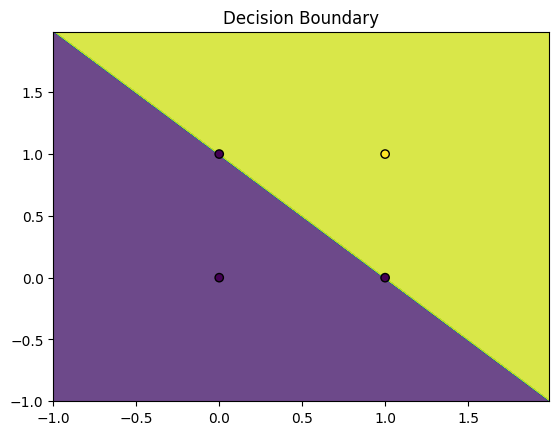

Accuracy: 1.0


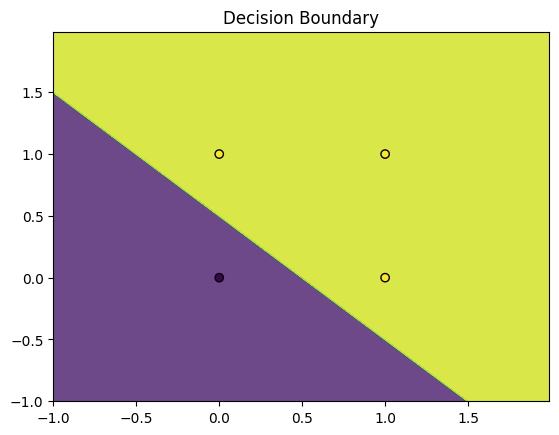

Accuracy: 1.0


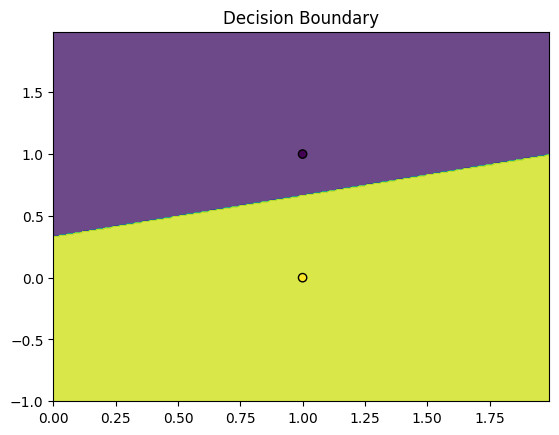

In [84]:

# Predictions
y_pred = model_and.predict(X)
print("Accuracy:", accuracy_score(y_and, y_pred))
# Decision Boundary Visualization

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min,y_max, 0.01))
Z = model_and.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_and, edgecolor='k')
plt.title("Decision Boundary")
plt.show()

#or
# Predictions
y_pred = model_or.predict(X)
print("Accuracy:", accuracy_score(y_or, y_pred))
# Decision Boundary Visualization

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min,y_max, 0.01))
Z = model_or.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_or, edgecolor='k')
plt.title("Decision Boundary")
plt.show()

y_pred = model_not.predict(X_not)
print("Accuracy:", accuracy_score(y_not, y_pred))
x_min, x_max = X_not[:, 0].min() - 1, X_not[:, 0].max() + 1
y_min, y_max = X_not[:, 1].min() - 1, X_not[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min,y_max, 0.01))
Z = model_not.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_not[:, 0], X_not[:, 1], c=y_not, edgecolor='k')
plt.title("Decision Boundary")
plt.show()



Task 3

In [64]:

# Generate two Gaussian distributions
class1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
class2 = np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], 100)
# Add an outlier
class2 = np.vstack([class2, [10, 10]])
# Labels
X = np.vstack([class1, class2])
y = np.hstack([np.ones(100), -np.ones(101)])


In [65]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [66]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9508196721311475


Task 4

In [67]:

digits = load_digits()
mask = (digits.target == 0) | (digits.target == 1)
X = digits.data[mask]
y = digits.target[mask]
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
model = Perceptron(max_iter=1, eta0=0.1, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(eta0=0.1, max_iter=1, random_state=42)

In [69]:

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[56  0]
 [ 0 52]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        52

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



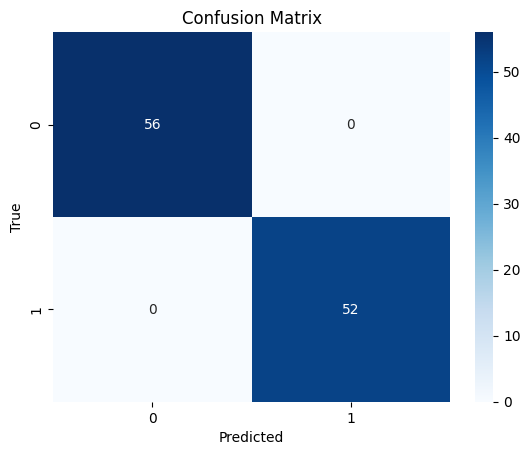

In [70]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
cmap='Blues')
plt.title("Confusion Matrix");plt.xlabel("Predicted");plt.ylabel("True")
plt.show()
